### 美国房价售价预测实验

#### 1.1 实验介绍

本实验主要是依据房屋的属性信息,包括房屋的卧室数量,卫生间数据,房屋的大小,房屋地下室的大小,房屋的外观,房屋的评分,房屋的修建时间,房屋的翻修时间,位置信息等,对房屋的价格进行预测,从而为此类问题提供技术参考

#### 1.2 实验目的

能够使用所学的数据挖掘知识对实际回归问题进行分析和处理

#### 1.3 预备知识

#### 1.4 环境介绍

#### 1.5 实验思路

#### 1.6 实验过程和步骤

##### 步骤1 加载库

In [1]:
# import libs 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

##### 步骤2 读取数据

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


##### 步骤3 输出前5行数据

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


##### 步骤4 输出属性信息

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

##### 步骤5 输出描述信息

In [11]:
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

##### 步骤6 输出空值信息

In [5]:
#print(df.isnull().any())
#删除空行
df = df.dropna(axis=0,how='any')
#检验是空值
print(df.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


##### 步骤7 查看每种属性与房价的分布关系

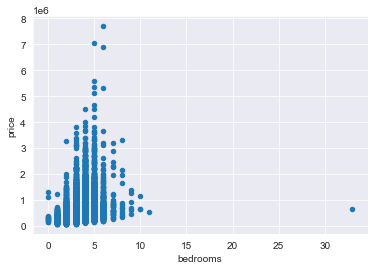

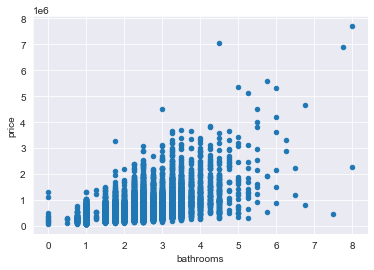

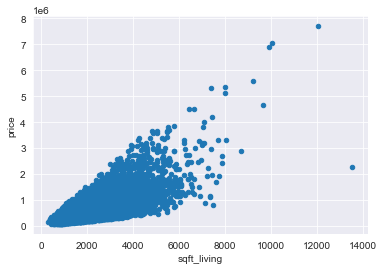

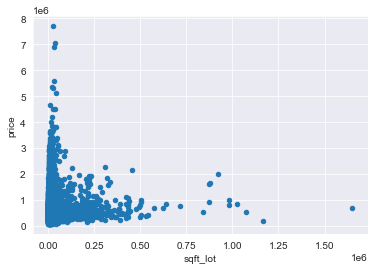

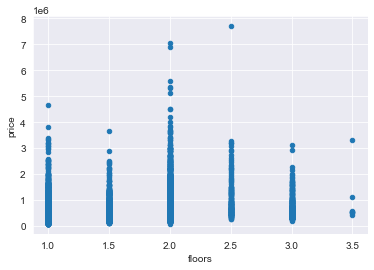

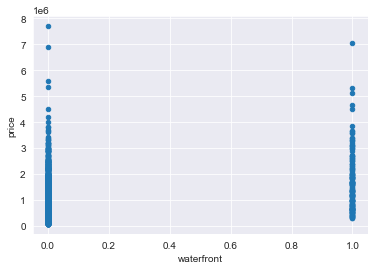

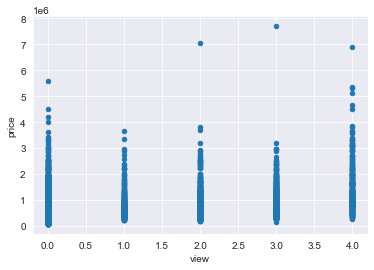

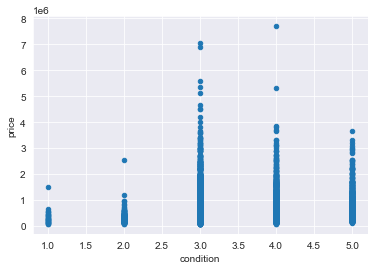

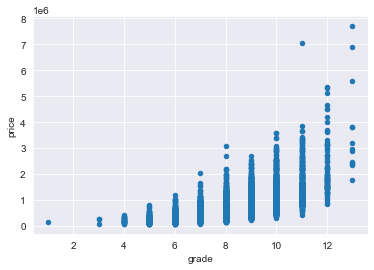

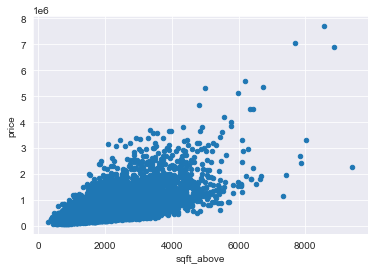

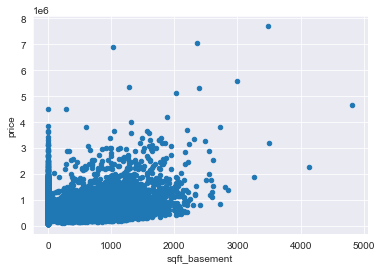

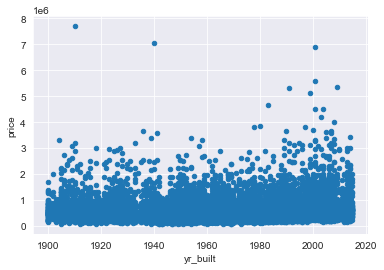

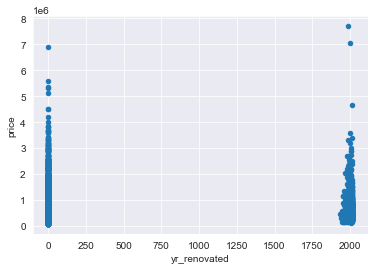

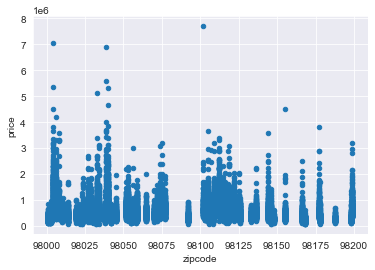

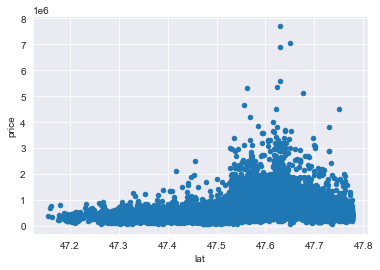

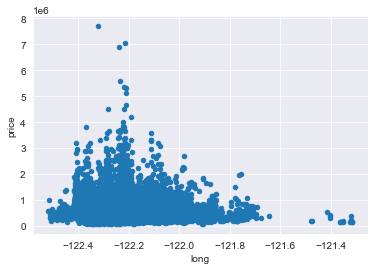

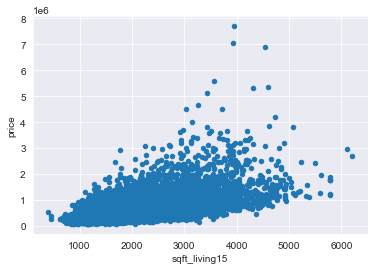

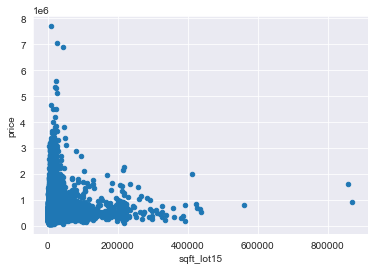

In [6]:
# 还有如此操作
x_vars = df.columns[3:]  # 从第三列开始创建DataFrame为x的变更
for x_var in x_vars:
    df.plot(kind='scatter',x=x_var,y='price') # 分别作每种房子属性对价格的关系图
plt.show()

##### 步骤8 查看属性之间的相关关系

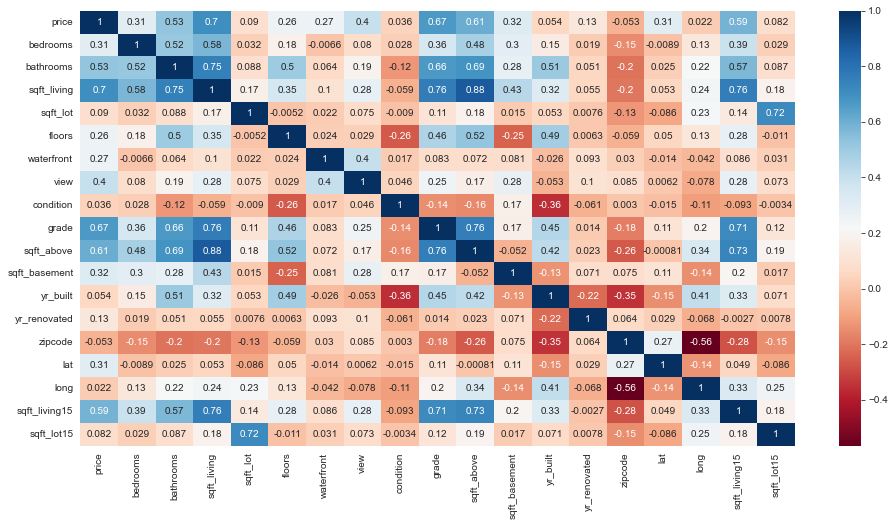

In [7]:
# 删除id列
df.drop(["id"],axis=1,inplace=True)
# 删除id列后 dataframe,建立corr关系
corr = df.corr()
plt.figure(figsize=(16,8))
# 画热力图
sns.heatmap(corr, annot=True, cmap="RdBu")
plt.show()

##### 步骤9 简化相关图

 显示下三角相关系数,用于呈现属性之间的相关系数图

/var/folders/n6/fyxwnr8d7t7bggkm1gp2ld240000gn/T/ipykernel_61287/1300375058.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool)


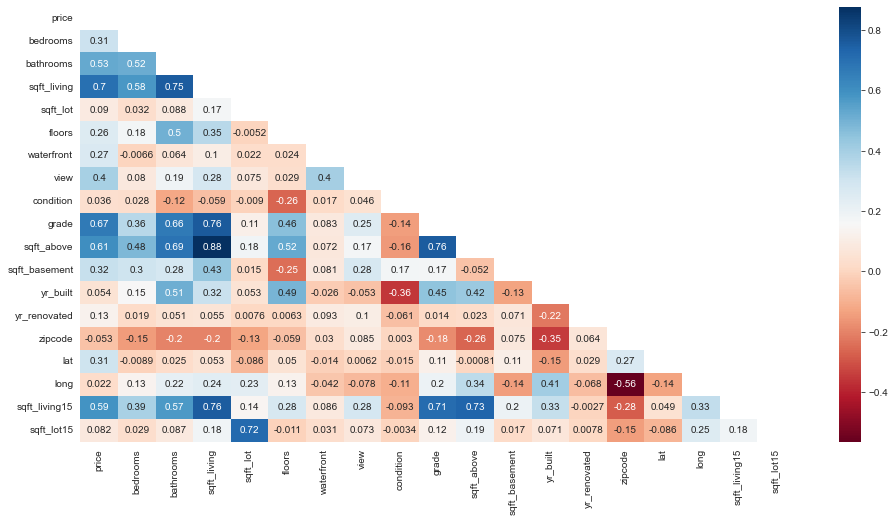

In [8]:
plt.figure(figsize=(16,8))
# 
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.set_style(style='white')
sns.heatmap(corr,annot=True,cmap="RdBu",mask=mask)
plt.show()

#### 步骤10 显示相关系数高于0.5的属性相关图,获取满足条件的属性

/var/folders/n6/fyxwnr8d7t7bggkm1gp2ld240000gn/T/ipykernel_61287/3224709047.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr[corr>=.5],dtype=np.bool)


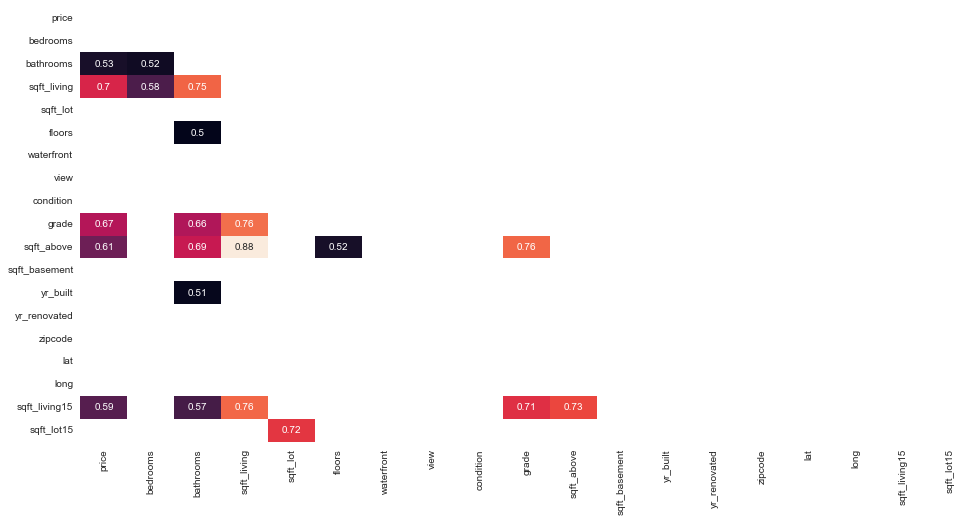

In [9]:
plt.figure(figsize=(16,8))
mask = np.zeros_like(corr[corr>=.5],dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.set_style(style='white')
sns.heatmap(corr[corr>=.5],annot=True,mask=mask,cbar=False)
plt.show()

#### 步骤11 查看所有房子的地理分布的散点图,查看房屋的地理分布是否存在相关的分布规律

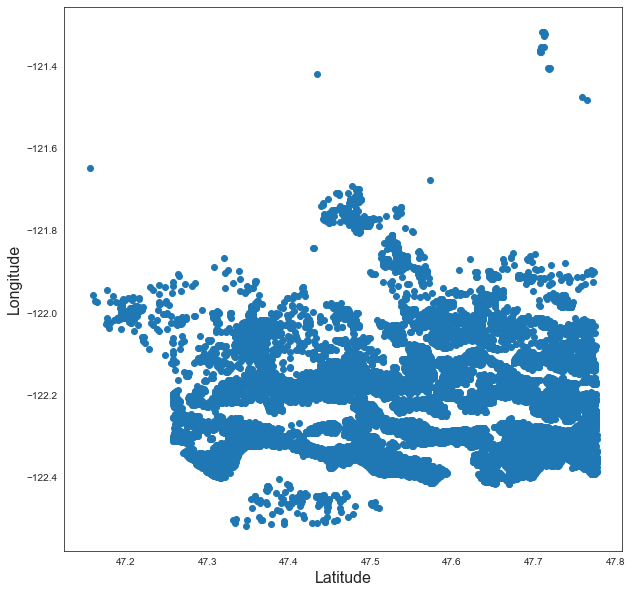

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(df.lat,df.long)
plt.ylabel('Longitude',fontsize=16)
plt.xlabel('Latitude',fontsize=16)
plt.show()

#### 步骤12 分析邮编与房价的分布关系

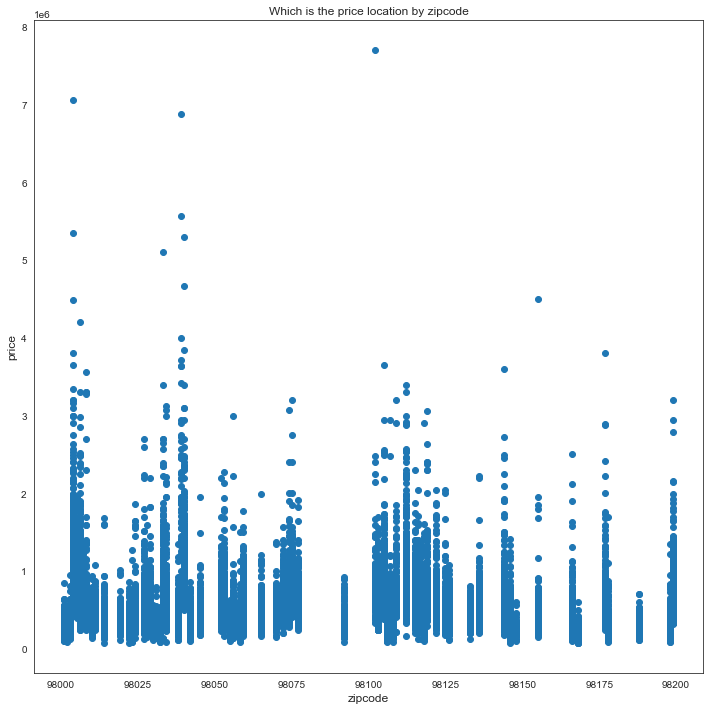

In [11]:
plt.figure(figsize=(12,12))
plt.scatter(df.zipcode,df.price)
plt.xlabel('zipcode',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title("Which is the price location by zipcode",fontsize=12)
plt.show()

#### 步骤13 配置训练数据与测试数据

由于本案例是依据房屋的属性信息对房屋的价格进行预测，预测的是连续变量，因此这里主要采用回归模型进行预测。在回归模型中最常用的算法有线性回归，随机森林，GBDT，KNN，决策树等模型，这里首先采用线性回归进行数据分析。

In [12]:
#使用线性回归模型进行数据分析
from sklearn.linear_model import LinearRegression
#选择用于进行回归分析的属性集，由于数据拆分函数对数据类型有要求，因此此处对属性集进行矩阵转换
#此处由于属性维度较少，使用部分属性可能会造成信息丢失，因此此处采用全量属性进行分析，
#但在实际问题中，若是属性维度较大，一般会依据前面相关系数的结果对属性集进行筛选。
#X = df.as_matrix(['bedrooms', 'bathrooms', 'sqft_living',\
#     'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',\
#       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',\
#       'lat', 'long', 'sqft_living15', 'sqft_lot15'])
X = df.drop(['date','price'],axis=1)
#选择价格作为回归更新的标签值
y = df['price']
#导入数据拆分算法train_test_split进行数据集的拆分
from sklearn.model_selection import train_test_split
#将数据拆分为训练数据和测试数据
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

#### 步骤14 数据标准化处理

In [13]:
#调用数据标准化模块
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#对属性数据进行标准化处理
sc.fit(X_train)
#对训练数据属性集进行标准化处理
X_train= sc.transform(X_train)
#对测试数据属性集进行标准化处理
X_test = sc.transform(X_test)
#X_train
#y_train
print(X_train.dtype)

float64


#### 步骤15 采用线性回归模型

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#采用线性回归进行模型训练
model.fit(X_train, y_train)
#print(X_train)
#let us predict
#获取模型预测结果
y_pred=model.predict(X_test)
#打印模型评分结果
print(model.score(X_test, y_test))

0.6966739266505446


#### 步骤16 采用随机森林算法模型

In [15]:
#导入随机森林回归模型
from sklearn.ensemble import RandomForestRegressor
#配置模型中回归树的个数为500
model = RandomForestRegressor(n_estimators=500)
#采用随机森林回归模型进行模型训练
model.fit(X_train, y_train)
#采用随机森林回归模型进行预测
y_pred=model.predict(X_test)
#打印模型评分结果
print (model.score(X_test, y_test))

0.862177277513121


#### 步骤17 采用梯度提升树建立回归模型

In [16]:
# 导入GradientBootingRegressor GBDT
from sklearn.ensemble import GradientBoostingRegressor
# 配置GBDT回归模型的分类器的个数
model = GradientBoostingRegressor(n_estimators=500)
# 采用训练数据进行模型训练
model.fit(X_train,y_train)
# 采用测试数据进行模型预测
y_pred = model.predict(X_test)
# 输出模型评估值
print(model.score(X_test,y_test))
# 输出模型评估值如下

0.8806804718823835


#### 步骤18 采用最近邻算法建立回归模型

In [17]:
# 导入K邻近算法模型 from sklearn.neighbors import KNeighorsRegressor
from sklearn.neighbors import KNeighborsRegressor
# 配置K临近算法的参数n_neighbors为10
model = KNeighborsRegressor(n_neighbors=10)
# 采用 knn模型对训练数据进行训练
model.fit(X_train,y_train)
# 传入测试数据进行预测
y_pred = model.predict(X_test)
# 打印knn回归模型的评估值
print(model.score(X_test,y_test))

0.7891190434245547


#### 步骤19 采用决策树建立回归模型

In [18]:
# 导入决策回归模型
from sklearn.tree import DecisionTreeRegressor
# 建立决策回归算法模型
model = DecisionTreeRegressor()
# 使用X_train,y_train数据,决策回归模型调用fit方法对数据进行训练
model.fit(X_train,y_train)
# 使用X的测试数据进行预测
y_pred = model.predict(X_test)
# 打印决策回归模型的评估结果
print(model.score(X_test,y_test))

0.6774384693476606


#### 步骤20 采用梯度提升算法进行回归分析

In [19]:
#配置梯度提升树模型参数,树的棵树
model = GradientBoostingRegressor(n_estimators=500)
# 采用训练数据进行模型训练
model.fit(X_train,y_train)
#采用测试数据进行模型预测
y_predict = model.predict(X_test)
# 导入模型结果评估平均绝对误差,均方根误差和r2值
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# 计算平均绝对误差,均方根误差和r2的模型值,传入的值都是y的测试数据和y的预测数据
a=mean_absolute_error(y_test,y_predict)
b=mean_squared_error(y_test,y_predict)
c=r2_score(y_test,y_predict)

In [87]:
print(c)
print(a)
print(b)

0.8812305544600113
69763.48548229251
15937195676.217125


#### 步骤21 采用网格搜索算法进行模型参数优化

In [ ]:
model_gbr = GradientBoostingRegressor()
# 导入网络搜索模块
from sklearn.model_selection import GridSearchCV
# 对loss min_samples_leaf,alpha三个参数值进行最优风格搜索
parameters = {'loss':['ls','lad','huber','quantile'],'min_samples_leaf':[1,2,3,4,5],'alpha':[0.1,0.3,0.6,0.9]}
# 调用网格搜索模型进行最优参数搜索
modes_gs = GridSearchCV(estimator=model_gbr,param_grid=parameters,cv=5)
modes_gs.fit(X_train,y_train)
# 输出最优的模型评估值和模型参数值
a = modes_gs.best_score_
b = modes_gs.best_params_
print("Best score is:",a) 
print("Best Parameters are as follow:",b)
# 结果如下:

#### 步骤22 采用最优参数进行数据建模分析

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
# 配置最优模型参数的模型
model = GradientBoostingRegressor(n_estimators=500,alpha=0.6,loss='ls',min_samples_leaf=5)
# 调用最优模型参数进行训练
model.fit(X_train,y_train)
# 使用最优模型进行预测
y_pred = model.predict(X_test)
# 输出计算的r2模型值,平均绝对值误差和均方误差
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(model.score(X_test,y_test))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8793011416408394
69735.17110174075
16196095846.202267
